In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
import datetime

In [7]:
data = pd.read_csv('midlertidig_data.csv')

In [8]:
data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
data.set_axis(data['Date'], axis='index', inplace=True)
data['Date'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [11]:
data.drop(['Date'], axis=1, inplace=True)

In [18]:
data.fillna(0, inplace=True)

In [19]:
data

,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Bolivia,Bulgaria,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,3.0,0.0,26.0,10.0,41.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,21.0,42.0,69.0,0.0,16.0,0.0,0.0
2020-03-02,3.0,0.0,29.0,14.0,47.0,0.0,1.0,19.0,0.0,0.0,...,0.0,0.0,0.0,21.0,47.0,89.0,0.0,16.0,0.0,0.0
2020-03-03,0.0,0.0,33.0,18.0,0.0,0.0,0.0,38.0,0.0,0.0,...,0.0,0.0,0.0,0.0,69.0,103.0,0.0,0.0,0.0,0.0
2020-03-04,5.0,1.0,41.0,24.0,49.0,0.0,4.0,72.0,0.0,0.0,...,0.0,0.0,1.0,27.0,109.0,125.0,0.0,0.0,0.0,0.0
2020-03-05,12.0,0.0,52.0,29.0,52.0,0.0,6.0,125.0,0.0,0.0,...,0.0,0.0,0.0,0.0,164.0,159.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13,48007.0,535690.0,26607.0,32951.0,58839.0,336044.0,73975.0,94900.0,125982.0,17891.0,...,289635.0,4703.0,151859.0,78849.0,365174.0,6486108.0,1780.0,1060.0,13466.0,7508.0
2020-09-14,48254.0,546468.0,26651.0,33335.0,59586.0,337520.0,74173.0,95196.0,126791.0,17918.0,...,291162.0,4799.0,154335.0,79489.0,368504.0,6519979.0,1808.0,1063.0,13539.0,7526.0
2020-09-15,48496.0,555524.0,26692.0,33884.0,60307.0,339332.0,74360.0,96821.0,127619.0,18061.0,...,292878.0,4799.0,156797.0,80266.0,371125.0,6554820.0,1812.0,1063.0,13720.0,7531.0


In [41]:
kmeans = KMeans(n_clusters=4, random_state=4).fit(data.T)

In [42]:
labels = kmeans.labels_[:]
labels

array([0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0,
       0, 0, 0])

In [55]:
countries = []
for col in data.columns:
    countries.append(col)

countries

['Algeria',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bolivia',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Ghana',
 'Greece',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mexico',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Rwanda',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Togo',
 'Tunisia',
 

In [56]:
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

for l in range(len(labels)):
    if labels[l] == 0:
        df0.join(countries[l])
        
        
        

AttributeError: 'builtin_function_or_method' object has no attribute 'is_unique'

In [ ]:
plt.figure()
for country in countries:
    temp_segment = data_mod[data_mod['Entity'] == country].copy()
    plt.plot(temp_segment['Date'], temp_segment['Cases/population'])
plt.show()

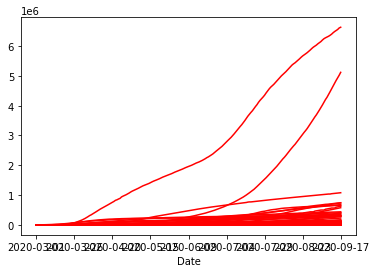

In [39]:
data.plot(legend='', c='r')